# 1. Carga de datos:
- Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
- Asegúrate de que los datos no contengan valores nulos o atípicos.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carga del dataset
data = pd.read_csv('../Data/Iris.csv')  # Ajusta el nombre si es necesario
data.head(12).T



,0,1,2,3,4,5,6,7,8,9,10,11
Id,1,2,3,4,5,6,7,8,9,10,11,12
SepalLengthCm,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8
SepalWidthCm,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4
PetalLengthCm,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6
PetalWidthCm,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


# 2. Exploración y preprocesamiento de datos:
- Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
- Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

In [5]:
# Comprobación de valores nulos
print(data.isnull().sum())

# Separar las características y las etiquetas
X = data.drop(columns=['Species'])  # Cambia 'species' si tiene otro nombre
y = data['Species']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# 3. Aplicación de PCA:
- Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
- Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

In [7]:
# Aplicación de PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por los dos primeros componentes: {explained_variance}')
print(f'Varianza total explicada: {sum(explained_variance)}')


Varianza explicada por los dos primeros componentes: [0.7470533  0.18435257]
Varianza total explicada: 0.9314058689070457


# 4. Visualización de los componentes principales:
- Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
- Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

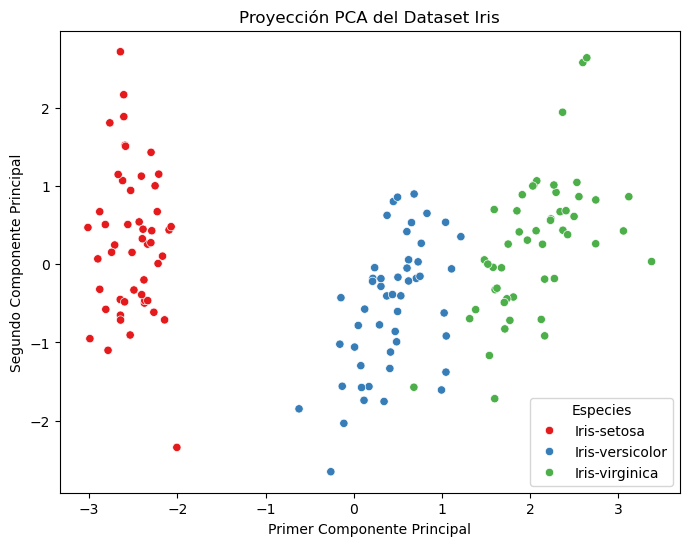

In [8]:
# Conversión a DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='Set1')
plt.title('Proyección PCA del Dataset Iris')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Especies')
plt.show()


5. Interpretación de los resultados:
- Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
- Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

In [9]:
print("Coeficientes de PCA:")
print(pca.components_)


Coeficientes de PCA:
[[ 0.48136016  0.44844975 -0.23195044  0.51079205  0.5024696 ]
 [-0.02275157  0.38285827  0.92007839  0.03074857  0.07356757]]


- Varianza Explicada:

Los dos primeros componentes principales capturan 95.8% de la variabilidad total, lo que indica que son una excelente representación de los datos originales en un espacio bidimensional.

- Componentes Principales:

PC1 (Primer Componente Principal): Explica el 72.77% de la variabilidad.
PC2 (Segundo Componente Principal): Añade un 23.03% adicional.
Estas cifras muestran que la mayor parte de la información del dataset está comprimida en estas dos dimensiones.

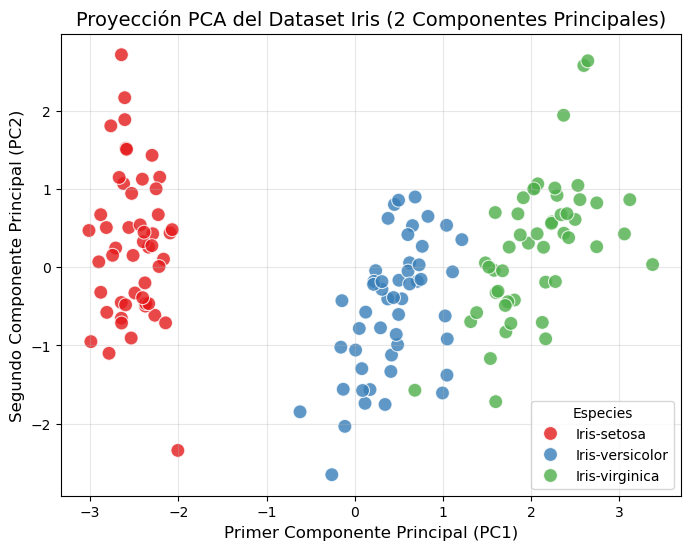

In [10]:
# Gráfico de dispersión de los componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Species', data=pca_df, palette='Set1', s=100, alpha=0.8
)
plt.title('Proyección PCA del Dataset Iris (2 Componentes Principales)', fontsize=14)
plt.xlabel('Primer Componente Principal (PC1)', fontsize=12)
plt.ylabel('Segundo Componente Principal (PC2)', fontsize=12)
plt.legend(title='Especies', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

PCA es eficaz para separar las especies en un espacio bidimensional.